In [1]:
import lightkurve as lk

In [2]:
tpf = lk.read("D:/works/Projects_Works/Astro/Lightcurves/Stars/MAST_2024-11-26T1202/MAST_2024-11-26T1202/TESS/tess2019306063752-s0018-0000000292404647-0162-s/tess2019306063752-s0018-0000000292404647-0162-s_tp.fits")
lc = tpf.to_lightcurve(aperture_mask = tpf.pipeline_mask)

In [3]:
lc.meta

{'APERTURE_MASK': array([[False, False, False, False, False, False, False, False, False,
         False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False],
        [False, False, False, False, False,  True,  True, False, False,
         False, False],
        [False, False, False, False,  True,  True,  True,  True, False,
         False, False],
        [False, False, False, False,  True,  True,  True,  True,  True,
         False, False],
        [False, False, False, False,  True,  True,  True,  True,  True,
         False, False],
        [False, False, False, False,  True,  True,  True, False, False,
         False, False],
        [False, False, False, False, False, False, False, False, False,
         False, False],
        [False, False, 

In [4]:
print(lc.time,"\n",lc.flux)

[1790.66160359 1790.6629925  1790.6643814  ... 1815.03217    1815.03355886
 1815.03494771] 
 [18930.693 18942.01  18918.613 ... 50699.1   50882.5   51137.375] electron / s


In [5]:
lc = lc.remove_outliers()

In [6]:
flat_lc = lc.flatten()
# flat_lc.plot()

In [7]:
pg = lc.to_periodogram(oversample_factor = 1)
# pg.plot()

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

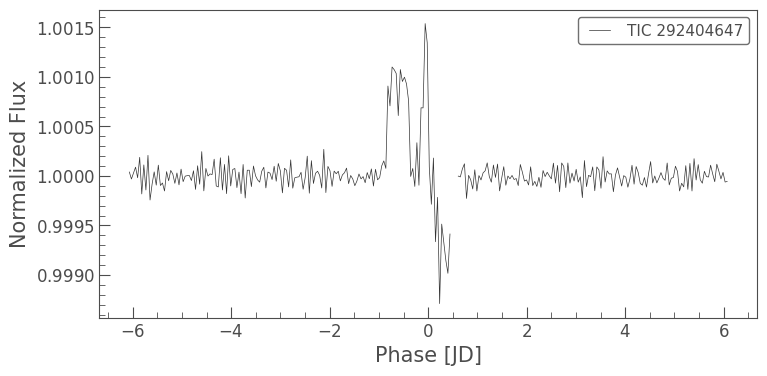

In [8]:
fold_lc = flat_lc.fold(period = pg.period_at_max_power)
fold_lc.bin(time_bin_size = 0.042).plot()